In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset
df_train = pd.read_csv('data/train.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('data/test.txt', names=['Text', 'Emotion'], sep=';')

In [3]:
x_train = df_train['Text']
y_train = df_train['Emotion']

x_test = df_test['Text']
y_test = df_test['Emotion']

df_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
df_train.Emotion.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

## Data Preprocessing

In [5]:
# encode label
y_train = y_train.replace({'joy':1, 'sadness':0, 'anger':0, 'fear':0, 'love':1, 'surprise':1})
y_test = y_test.replace({'joy':1, 'sadness':0, 'anger':0, 'fear':0, 'love':1, 'surprise':1})

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5)#, stop_words='english')

# We transform each text into a vector
x_train = tfidf.fit_transform(x_train).toarray()
x_test = tfidf.transform(x_test).toarray()


In [7]:
from pickletools import read_decimalnl_long

def evaluator(y_test, y_pred):
    ####################################################################################################
    # enter code here to implement the evaluation matrices including confusion matrix, accuracy, precision, recall and f1
    # DO NOT use any python packages such as scikit-learn
    
    #confusion matrix
    TP=FP=TN=FN=0
    for num in range(0,len(y_test)):
        if(y_test[num]==1&y_pred[num]==1):
            TP+=1
        elif(y_test[num]==0&y_pred[num]==1):
            FP+=1
        elif(y_test[num]==1&y_pred[num]==0):
            TN+=1
        else:
            FN+=1
    conf_matrix=[TP,FP,TN,FN]
    #accuracy 
    accuracy=(TP + TN) / (TP + FP + TN + FN)
    # precision   True Positives/(True Positives +False Positives)
    precision=TP/(TP+FP)
    # recall
    recall=TP/(TP+FN)
    # f1         2*Precision*Recall/(precision+Recall)
    f1=2*precision*recall/(precision+recall)
    return {'confusion matrix':conf_matrix,'accuracy':accuracy,'precision':precision,'recall':recall,'f1':f1}
    ####################################################################################################

In [8]:
from cgi import print_directory


class SimpleFeedbackLearning(object):
    def __init__(self):
        self.history = {}
        self.history['train_acc'] = []
        self.history['test_acc'] = []
        
    def f(self, x):
        ####################################################################################################
        # 4. enter code here to implement the activation function
        if(x>=0.5):
            fx=1
        else:
            fx=0

        ####################################################################################################
        return fx
    
    def train(self, x, y, x_test, y_test, learning_rate=0.1, n_iters=10, verbose=True):
        n_train, input_size = x.shape
        n_test = x_test.shape[0]
        # weight initialization
        self.W = np.zeros(input_size)
        self.b = np.zeros(1)

        for i in range(n_iters):
            for xi, yi in zip(x, y):
                # forward
                ####################################################################################################
                # 1. enter code here to calculate the output
                 #
                 a=np.dot(xi,self.W)+self.b
                 output=self.f(a)
                ####################################################################################################

                ####################################################################################################
                # 2. enter code here to adjust the weights and bias
                
                 if(output>yi):
                    self.W=self.W-learning_rate*xi
                    self.b=self.b-learning_rate*1
                 elif(output<yi):
                    self.W=self.W+learning_rate*xi
                    self.b=self.b+learning_rate*1 #
                
                 
                ####################################################################################################
            
            train_acc = (self.predict(x) == y).sum() / n_train
            test_acc = (self.predict(x_test) == y_test).sum() / n_test
            self.history['train_acc'].append(train_acc)
            self.history['test_acc'].append(test_acc)
            if verbose:
                print('epoch %d, train acc %.4f, test acc %.4f' % (i + 1, train_acc, test_acc))

    def predict(self, x):
        ####################################################################################################
        # 3. enter code here to complete the predict function
        # TODO: use the trained weights to predict labels and return the predicted labels
        y_pred=[]
        for xi in x:
            output=self.f(np.dot(xi,self.W)+self.b)
            y_pred.append(output)

        ####################################################################################################
        return y_pred

In [9]:
####################################################################################################
# enter code here to initialize and train the model
model1=SimpleFeedbackLearning()
model1.train(x_train,y_train,x_test,y_test)

####################################################################################################


epoch 1, train acc 0.8380, test acc 0.8225
epoch 2, train acc 0.9132, test acc 0.9025
epoch 3, train acc 0.9614, test acc 0.9405
epoch 4, train acc 0.9326, test acc 0.9180
epoch 5, train acc 0.9566, test acc 0.9210
epoch 6, train acc 0.9539, test acc 0.9375
epoch 7, train acc 0.9693, test acc 0.9330
epoch 8, train acc 0.9738, test acc 0.9355
epoch 9, train acc 0.9576, test acc 0.9300
epoch 10, train acc 0.9702, test acc 0.9285


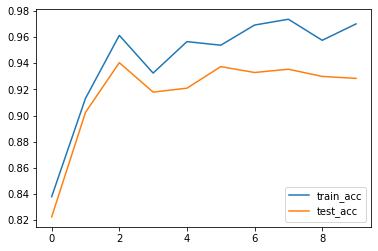

In [10]:
# plot the accuracy
plt.plot(model1.history['train_acc'], label='train_acc')
plt.plot(model1.history['test_acc'], label='test_acc')
plt.legend()
plt.show()

In [11]:
####################################################################################################
# enter code here to evaluate the model with the evaluator function

evaluator(y_test,model1.predict(x_test))

####################################################################################################

{'confusion matrix': [894, 0, 963, 143],
 'accuracy': 0.9285,
 'precision': 1.0,
 'recall': 0.8621022179363549,
 'f1': 0.92594510616261}